In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

Using TensorFlow backend.


# Data Preprocessing

In [2]:
# Set the random seed
random_seed = 135791113

def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    X_train = x_train.astype('float32')
    X_test = x_test.astype('float32')
    return X_train, y_train, X_test, y_test

def labelencoding(y_train, y_val, y_test, nb_classes):
    Y_val = to_categorical(y_val, num_classes = nb_classes)
    Y_test = to_categorical(y_test, num_classes = nb_classes)
    Y_train = to_categorical(y_train.reshape(-1, 1), num_classes = nb_classes)
    return Y_train, Y_val, Y_test

def split_dataset(X_train, Y_train):

    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)
    
    return X_train, X_val, Y_train, Y_val

In [3]:
CLASSES = 10
X_train, Y_train, X_test, Y_test = load_data()
X_train, X_val, Y_train, Y_val = split_dataset(X_train, Y_train)
Y_train, Y_val, Y_test = labelencoding(Y_train, Y_val, Y_test, CLASSES)

### Normalization

In [4]:
X_train = X_train / 255.

X_val = X_val / 255.

X_test = X_test / 255.

# Model: VGG-like convnet

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Model Compilation

In [6]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

### Training

In [7]:
BATCH_SIZE = 64
EPOCHS = 20
history = model.fit(X_train, Y_train, 
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, Y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 52s 1ms/step - loss: 1.7513 - acc: 0.3605 - val_loss: 1.3625 - val_acc: 0.5224
Epoch 2/20
40000/40000 [==============================] - 52s 1ms/step - loss: 1.3519 - acc: 0.5177 - val_loss: 1.2010 - val_acc: 0.5738
Epoch 3/20
40000/40000 [==============================] - 52s 1ms/step - loss: 1.1691 - acc: 0.5919 - val_loss: 1.0753 - val_acc: 0.6297
Epoch 4/20
40000/40000 [==============================] - 59s 1ms/step - loss: 1.0478 - acc: 0.6367 - val_loss: 1.0578 - val_acc: 0.6329
Epoch 5/20
40000/40000 [==============================] - 56s 1ms/step - loss: 0.9681 - acc: 0.6657 - val_loss: 0.9787 - val_acc: 0.6586
Epoch 6/20
40000/40000 [==============================] - 55s 1ms/step - loss: 0.9136 - acc: 0.6833 - val_loss: 0.7938 - val_acc: 0.7225
Epoch 7/20
40000/40000 [==============================] - 53s 1ms/step - loss: 0.8715 - acc: 0.7003 - val_loss: 0.7879 - val_acc

# Saving Model

## Learning Curves

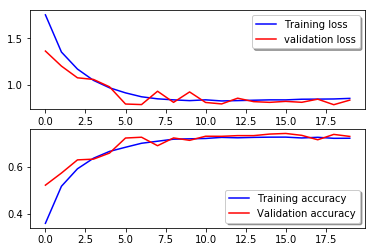

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

## Predict

In [9]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

## Metrics

In [ ]:
Y_true = np.argmax(Y_test, axis=1)
acc = accuracy_score(Y_true, predictions)

print("Accuracy: {}".format(acc))
